In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
#Supress the warnings
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

import seaborn as sns


In [59]:
#Reading data
wine_data=pd.read_csv('QualityPrediction.csv')

In [6]:
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [7]:
#EDA-Exploratory data analysis
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [9]:
wine_data.isnull().sum()



fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


#

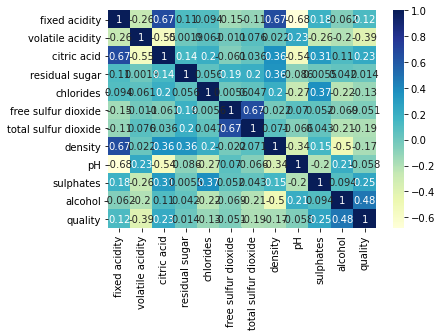

In [11]:
#correlation
sns.heatmap(wine_data.corr(), cmap = "YlGnBu", annot = True)
plt.show()

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

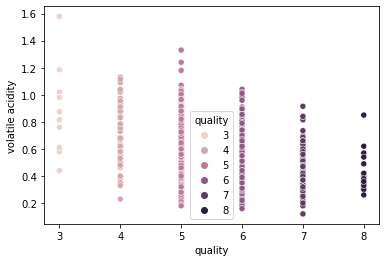

In [12]:
#Visualisation
sns.scatterplot(x='quality', y='volatile acidity',hue ='quality', data=wine_data)

#sns.plot(wine_data, x_vars = ['alcohol','sulphates'], y_vars = 'quality', size = 5)

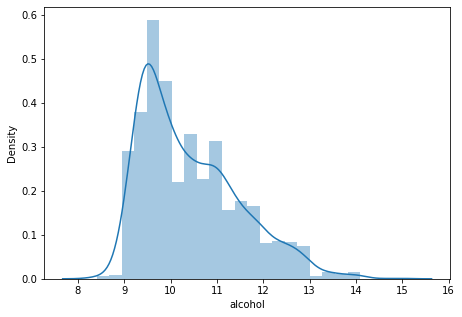

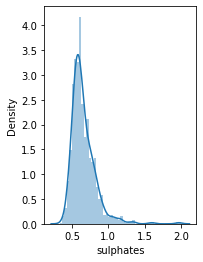

In [13]:
#Plotting the Distribution plots for the features
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(wine_data['alcohol'])
plt.show()
plt.subplot(1,2,2)
sns.distplot(wine_data['sulphates'])
plt.show()



# checking outliers

<AxesSubplot:>

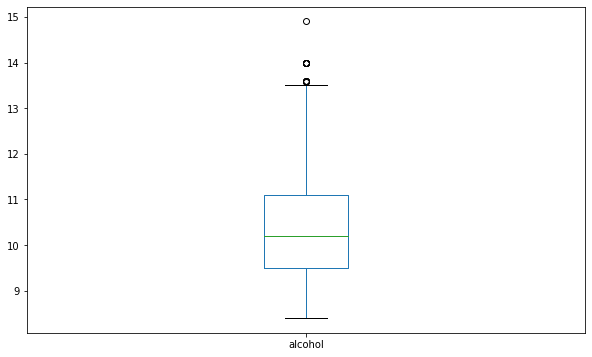

In [14]:
plt.figure(figsize=(10,6))
wine_data.alcohol.plot(kind='box')

In [15]:
wine_data['alcohol'].describe()

count    1599.000000
mean       10.422983
std         1.065668
min         8.400000
25%         9.500000
50%        10.200000
75%        11.100000
max        14.900000
Name: alcohol, dtype: float64

In [16]:
wine_data.drop(wine_data[wine_data['alcohol']>14].index,axis=0,inplace=True)

In [17]:
wine_data['sulphates'].describe()


count    1598.000000
mean        0.658035
std         0.169499
min         0.330000
25%         0.550000
50%         0.620000
75%         0.730000
max         2.000000
Name: sulphates, dtype: float64

In [18]:
wine_data.drop(wine_data[wine_data['sulphates']>2].index,axis=0,inplace=True)

<AxesSubplot:xlabel='alcohol'>

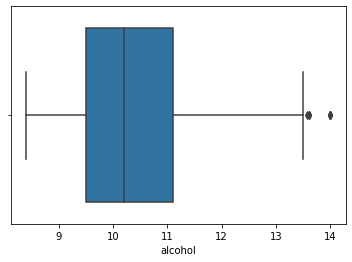

In [19]:
#since most of the variables are skewed,outliers are detected using IQR method and not Z-score.
#forming box-plot for skewed 
###finding outliers
import seaborn as sns
sns.boxplot(wine_data['alcohol'])

# IQR
Q1 = np.percentile(wine_data['alcohol'], 25,
				interpolation = 'midpoint')

Q3 = np.percentile(wine_data['alcohol'], 75,
				interpolation = 'midpoint')
IQR = Q3 - Q1


percentile25 = wine_data.quantile(0.25)
#percentile75 = df['placement_exam_marks'].quantile(0.75)

# preprocessing

In [20]:
y=wine_data['quality']

In [21]:
wine_data.drop(['quality'],inplace=True,axis=1)


In [22]:
X=wine_data
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [23]:
from sklearn.preprocessing import StandardScaler
Std=StandardScaler()
x=Std.fit_transform(X)

In [24]:
x

array([[-0.5286164 ,  0.96125374, -1.39146976, ...,  1.28875509,
        -0.57856255, -0.96265104],
       [-0.29750039,  1.96678162, -1.39146976, ..., -0.72209091,
         0.12962815, -0.58520798],
       [-0.29750039,  1.2964297 , -1.18588834, ..., -0.33289491,
        -0.04741953, -0.58520798],
       ...,
       [-1.16418541, -0.10013679, -0.72333013, ...,  0.70496109,
         0.54273938,  0.54712119],
       [-1.39530142,  0.65400912, -0.77472549, ...,  1.67795109,
         0.30667582, -0.20776492],
       [-1.33752242, -1.21738998,  1.02411197, ...,  0.51036309,
         0.01159636,  0.54712119]])

In [25]:
#Split Data into Train and Test data sets


In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# Build decision tree model



In [27]:
#Decision Tree with Cart(Gini)
#Decision Tree with depth 2

model_dt_2 = DecisionTreeClassifier(random_state=1,max_depth=2)

model_dt_2.fit(x_train,y_train)

model_dt_2_score_tarin = model_dt_2.score(x_train,y_train)

model_dt_2_score_test = model_dt_2.score(x_test,y_test)

print('Trining Score',model_dt_2_score_tarin)

print('Testing Score',model_dt_2_score_test)

Trining Score 0.554773082942097
Testing Score 0.571875


In [28]:
#Decision Tree with depth 4
model_dt_4 = DecisionTreeClassifier(random_state=1,max_depth=4)

model_dt_4.fit(x_train,y_train)

model_dt_4_score_tarin = model_dt_4.score(x_train,y_train)

model_dt_4_score_test = model_dt_4.score(x_test,y_test)

print('Trining Score',model_dt_4_score_tarin)

print('Testing Score',model_dt_4_score_test)

Trining Score 0.6455399061032864
Testing Score 0.6375


In [29]:
#Decision Tree with depth 6
model_dt_6 = DecisionTreeClassifier(random_state=1,max_depth=6)

model_dt_6.fit(x_train,y_train)

model_dt_6_score_tarin = model_dt_6.score(x_train,y_train)

model_dt_6_score_test = model_dt_6.score(x_test,y_test)

print('Trining Score',model_dt_6_score_tarin)

print('Testing Score',model_dt_6_score_test)

Trining Score 0.7151799687010955
Testing Score 0.621875


In [30]:
#Decision Tree with depth 8
model_dt_8 = DecisionTreeClassifier(random_state=1,max_depth=8)

model_dt_8.fit(x_train,y_train)

model_dt_8_score_tarin = model_dt_8.score(x_train,y_train)

model_dt_8_score_test = model_dt_8.score(x_test,y_test)

print('Trining Score',model_dt_8_score_tarin)

print('Testing Score',model_dt_8_score_test)

Trining Score 0.8004694835680751
Testing Score 0.615625


In [31]:
# Decision Tree with c4.5(entropy)

model_dt = DecisionTreeClassifier(max_depth=2,criterion='entropy')

model_dt.fit(x_train,y_train)

y_pred_dt = model_dt.predict_proba(x_test)[:,1]
# y_pred_dt

model_dt_score_train = model_dt.score(x_train,y_train)
print(model_dt_score_train)

model_dt_score_test = model_dt.score(x_test,y_test)
print(model_dt_score_test)

0.5477308294209703
0.578125


# Graphical Represetation of Tree

In [32]:
# pip install graphviz
# conda install graphviz
from io import StringIO


In [33]:
# from sklearn.externals.six import StringIO

In [46]:
import pandas
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

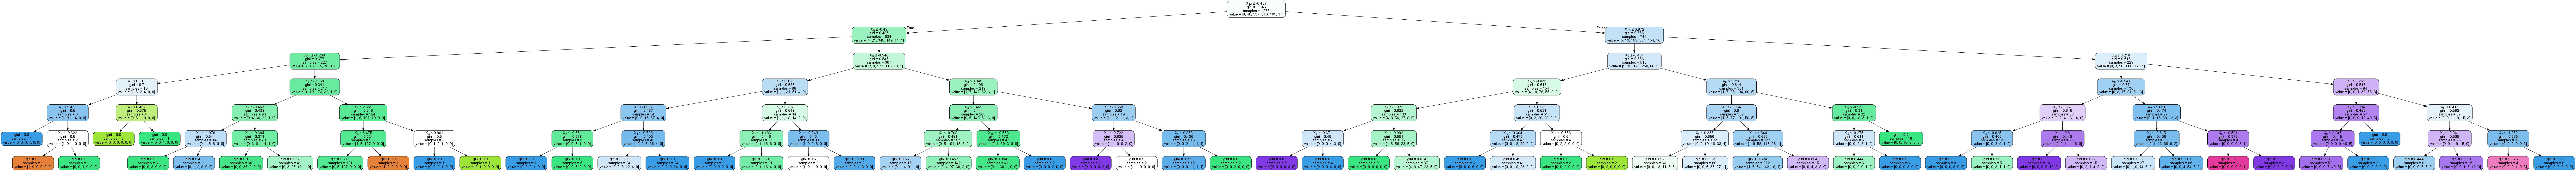

<Figure size 2160x2160 with 0 Axes>

In [55]:

plt.figure(figsize=(30,30))
dot_data = StringIO()
export_graphviz(model_dt_6,out_file=dot_data,
               filled=True,rounded=True,
               special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [65]:
# Binarize the output
y = label_binarize(y, classes=[3, 4, 5,6,7,8])
n_classes = y.shape[1]


In [70]:
y_test.shape

(320,)

In [72]:
y_score = model_dt_6.predict(x_test)
# print(predictions)

print(model_dt_6.score(x_test,y_test))
#y_actual_result = y_test[0]
# print(y_actual_result)

0.621875


In [73]:
print(y_score)
predictions.shape

[6 5 5 5 6 6 5 6 6 6 7 5 6 5 5 5 6 5 5 6 7 6 6 6 6 6 6 5 5 5 6 6 5 6 6 6 6
 5 6 6 5 6 5 5 6 5 5 5 5 5 5 6 5 5 6 6 6 6 5 5 6 7 5 7 6 6 6 5 7 5 5 5 6 6
 5 5 5 6 6 6 5 6 6 5 6 5 5 5 6 5 7 5 5 5 6 5 5 6 5 6 6 6 6 6 5 5 5 5 5 5 7
 3 5 6 6 5 5 6 6 5 5 5 5 7 6 6 5 5 5 5 6 6 5 6 5 5 5 5 5 7 5 6 5 6 7 6 5 5
 5 6 6 8 5 5 5 6 7 6 5 6 6 6 7 5 5 6 6 5 7 5 6 6 5 5 5 6 6 6 6 5 5 5 5 5 5
 5 5 7 5 5 7 7 5 6 5 5 6 5 5 5 6 8 7 5 5 6 6 6 5 6 6 6 6 6 6 5 6 5 6 5 6 6
 5 5 6 5 5 5 6 6 5 6 6 5 4 5 7 5 5 5 5 7 6 5 7 5 6 5 5 5 7 6 6 5 5 5 5 5 5
 6 6 6 6 7 6 5 5 6 6 5 5 7 5 5 5 7 6 5 5 6 5 6 5 6 6 6 5 6 6 5 6 5 5 5 7 6
 5 7 6 5 6 5 5 5 5 6 5 6 5 5 6 7 5 6 6 5 6 5 5 6]


(320,)

In [76]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
from urllib.request import urlopen 

plt.style.use('ggplot')
pd.set_option('display.max_columns', 500) 

In [78]:
# Set the random state for reproducibility
fit_rf = RandomForestClassifier(random_state=42)

In [81]:
np.random.seed(42)
#start = time.time()

param_dist = {'max_depth': [2, 3, 4],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(fit_rf, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(x, y)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
#end = time.time()
#print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'bootstrap': False, 'criterion': 'gini', 'max_depth': 4, 'max_features': None}


In [84]:
# Set best parameters given by grid search 
fit_rf.set_params(criterion = 'gini',
                  max_features = None, 
                  max_depth = 4)

RandomForestClassifier(max_depth=4, max_features=None, random_state=42)

In [85]:
fit_rf.fit(x,y)

RandomForestClassifier(max_depth=4, max_features=None, random_state=42)

In [109]:
predictions_rf = fit_rf.predict(x_test)
predictions_rf

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       ...,
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0]])

In [110]:
print(classification_report(y_test,y_score))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       1.00      0.08      0.14        13
           5       0.67      0.76      0.71       143
           6       0.59      0.59      0.59       128
           7       0.56      0.44      0.49        34
           8       0.00      0.00      0.00         1

    accuracy                           0.62       320
   macro avg       0.47      0.31      0.32       320
weighted avg       0.63      0.62      0.61       320

